In [1]:
from plot_vectors import plotVectors
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ordevoir-dark")

# Линейные преобразования

Создадим исходный набор двумерных векторов, заключенных в квадрат:

In [2]:
xs = np.arange(-1, 1.1, 0.1)

origin_vectors = np.array([[i, j] for i in xs for j in xs])
origin_vectors.shape

(441, 2)

## Поворот (Rotate)

0.707, -0.707
0.707, 0.707


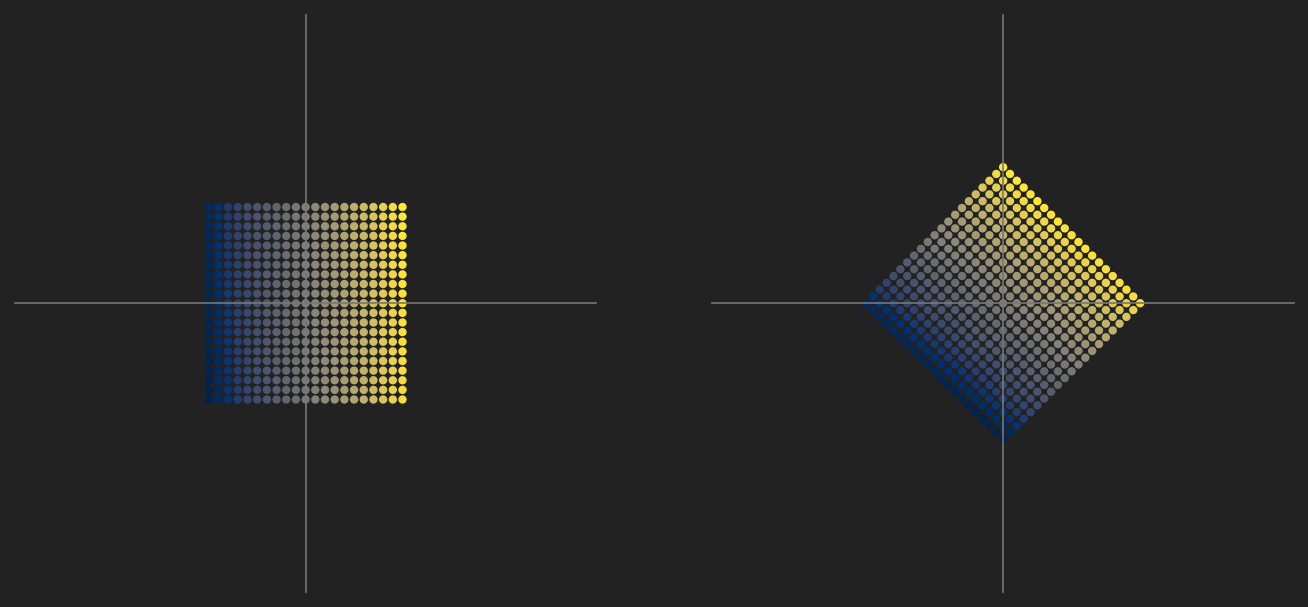

In [3]:
from numpy import pi, cos, sin
plt.style.use("ordevoir-dark")

degree = 45
angle = pi * degree / 180
# angle = pi / 3

rotate = np.array([ [cos(angle), -sin(angle)], 
                    [sin(angle),  cos(angle)]])
print(f"{rotate[0, 0] :.3f}, {rotate[0, 1] :.3f}\n{rotate[1, 0] :.3f}, {rotate[1, 1] :.3f}")
rotated_v = np.empty_like(origin_vectors)

for i in range(origin_vectors.shape[0]):
    rotated_v[i] = np.matmul(rotate, origin_vectors[i])

plotVectors(origin_vectors, rotated_v)

## Растяжение (Stretch)

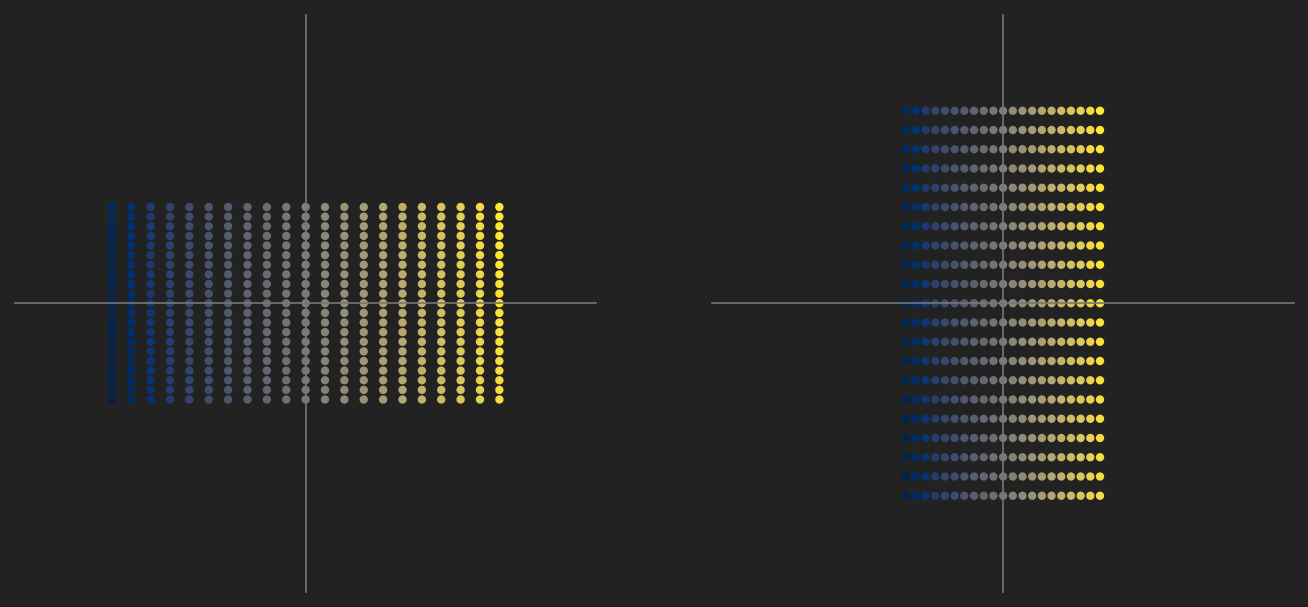

In [4]:
stretched_along_x = np.empty_like(origin_vectors)
stretched_along_y = np.empty_like(origin_vectors)
stretchX = np.array([[2, 0], 
                     [0, 1]])

stretchY = np.array([[1, 0], 
                     [0, 2]])

for i in range(origin_vectors.shape[0]):
    stretched_along_x[i] = np.matmul(stretchX, origin_vectors[i])
    stretched_along_y[i] = np.matmul(stretchY, origin_vectors[i])

plotVectors(stretched_along_x, stretched_along_y)

## Отражение (Reflect)

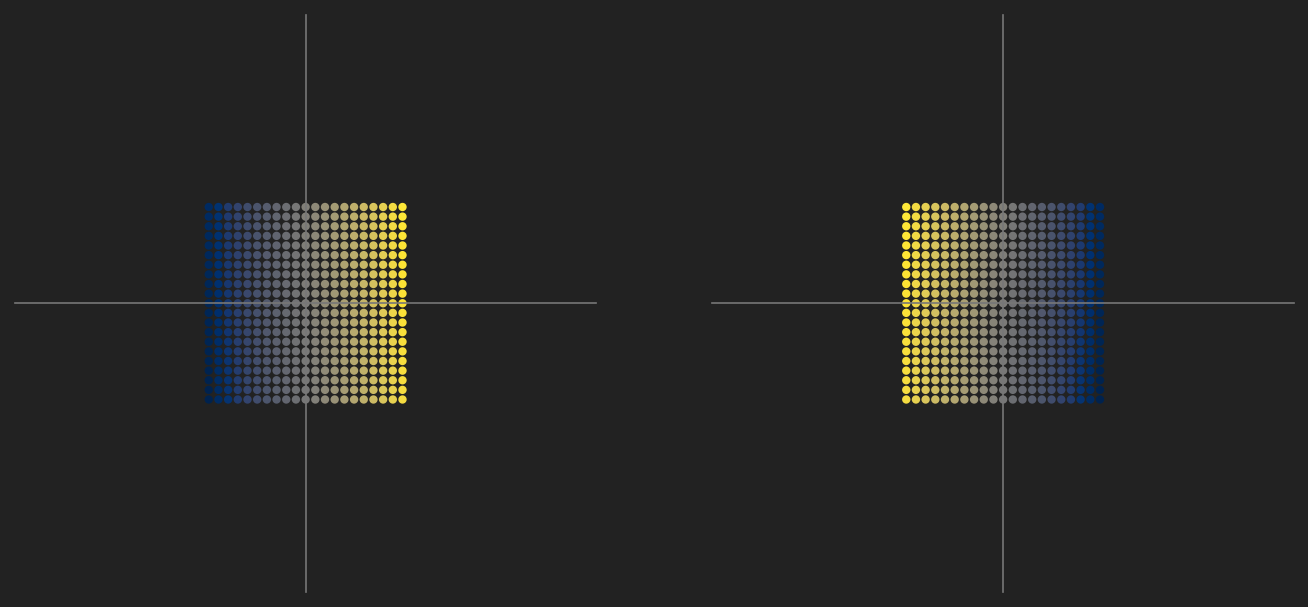

In [5]:
morrored_y = np.empty_like(origin_vectors)
mirrorY = np.array([[-1, 0], 
                    [0, 1]])
mirrorX = np.array([[1, 0], 
                    [0, -1]])

for i in range(origin_vectors.shape[0]):
    morrored_y[i] = np.matmul(mirrorY, origin_vectors[i])
    
plotVectors(origin_vectors, morrored_y)

## Сдвиг (Shift)

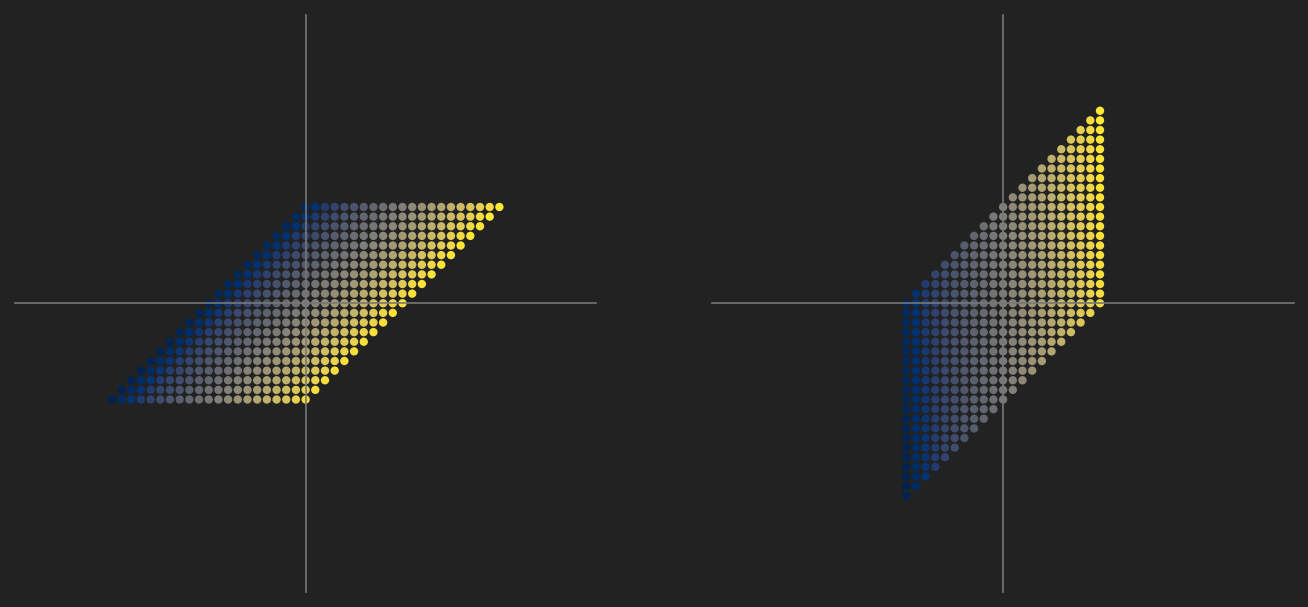

In [6]:
sheared_x = np.empty_like(origin_vectors)
sheared_y = np.empty_like(origin_vectors)
shearX = np.array([ [1, 1], 
                    [0, 1]])
shearY = np.array([ [1, 0], 
                    [1, 1]])

for i in range(origin_vectors.shape[0]):
    sheared_x[i] = np.matmul(shearX, origin_vectors[i])
    sheared_y[i] = np.matmul(shearY, origin_vectors[i])
    
plotVectors(sheared_x, sheared_y)

# Композиция преобразований

## Поворот и растяжение

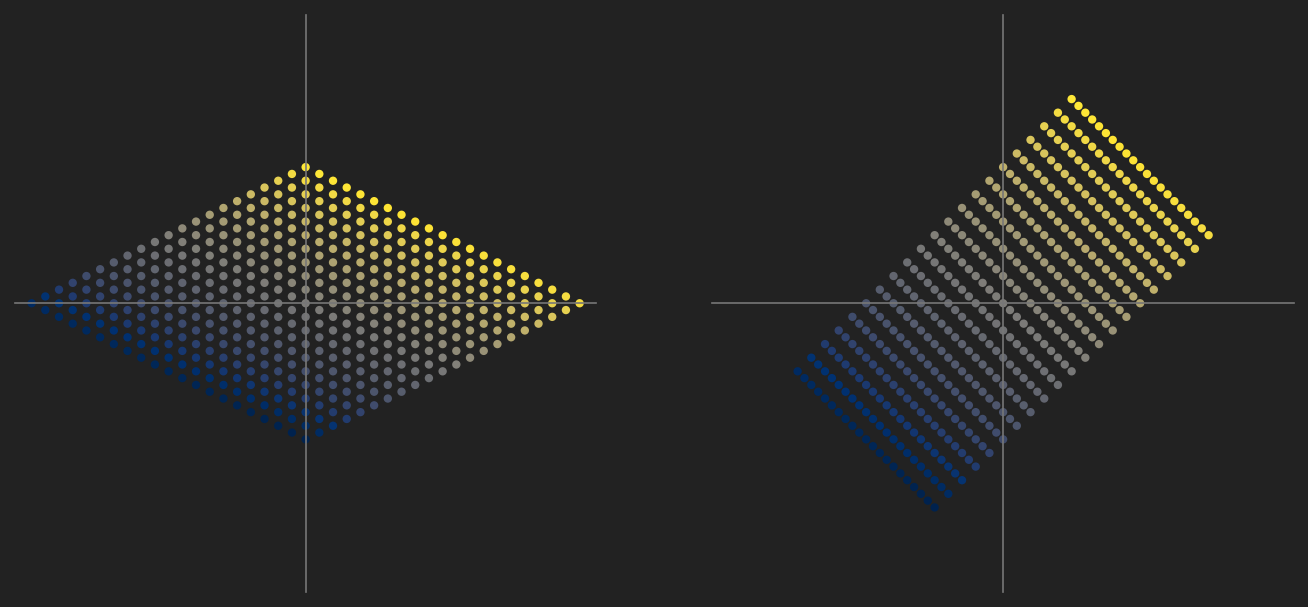

In [7]:
# последовательные трансформации
rs_v = np.empty_like(origin_vectors)
for i in range(origin_vectors.shape[0]):
    rs_v[i] = np.matmul(rotate, origin_vectors[i])    # поворот
    rs_v[i] = np.matmul(stretchX, rs_v[i])      # растяжение вдоль X

sr_v = np.empty_like(origin_vectors)
for i in range(origin_vectors.shape[0]):
    sr_v[i] = np.matmul(stretchX, origin_vectors[i])      # растяжение вдоль X
    sr_v[i] = np.matmul(rotate, sr_v[i])            # поворот

plotVectors(rs_v, sr_v)
# очевидно, что имеет значение порядок трансформаций

Того же результата можно добиться с использованием композиции матриц преобразования. Матричное произведения матриц $A$ и $B$ соответствует последовательным преобразованиям $A$ и $B$. Заметим, что преобразование $AB$ соответствует последовательным преобразованиям $B$, затем $A$: 
$$
AB\mathbf{v} = (AB)\mathbf{v} = A(B\mathbf{v})
$$ 

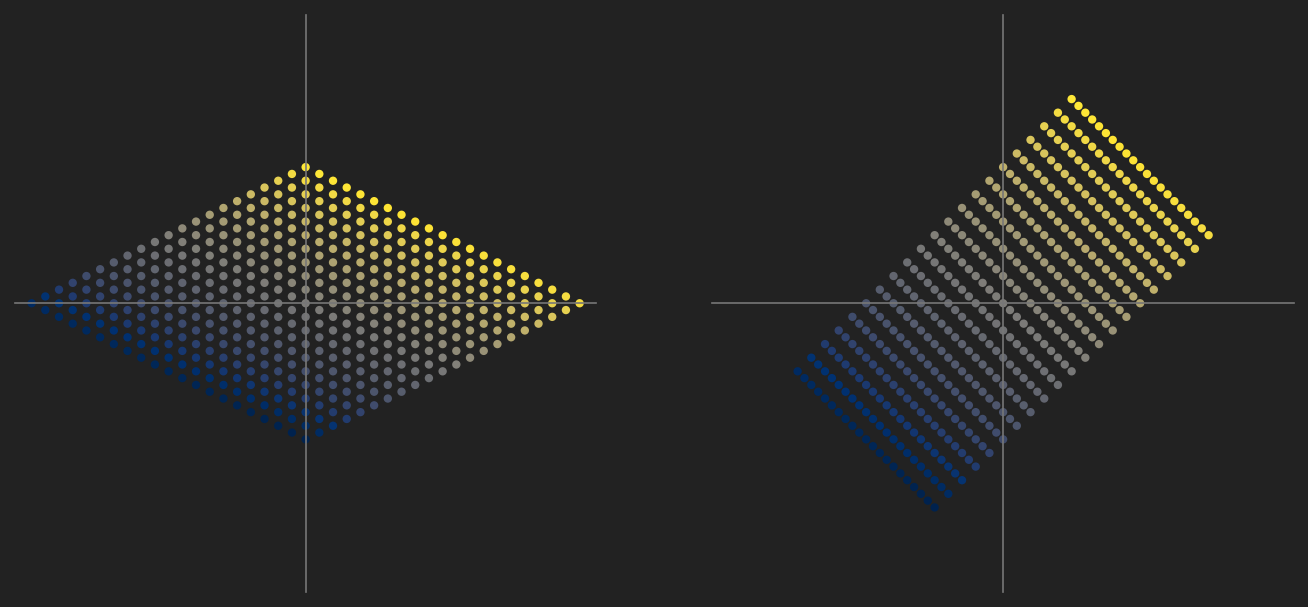

In [8]:
# композиция операторов поворота и растяжения:
sr_matrix = np.matmul(rotate, stretchX)     # растяжение, затем поворот
rs_matrix = np.matmul(stretchX, rotate)     # поворот, затем растяжение

rs_v = np.empty_like(origin_vectors)
sr_v = np.empty_like(origin_vectors)

for i in range(origin_vectors.shape[0]):
    rs_v[i] = np.matmul(rs_matrix, origin_vectors[i])
    sr_v[i] = np.matmul(sr_matrix, origin_vectors[i])

plotVectors(rs_v, sr_v)